In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import pickle

plt.rc('font', family='Apple SD Gothic Neo')


In [54]:
df_2001 = pd.read_csv('./data/20-01.csv')

df_2004 = pd.read_csv('./data/20-04.csv')
df_2005 = pd.read_csv('./data/20-05.csv')
df_2006 = pd.read_csv('./data/20-06.csv')
df_2007 = pd.read_csv('./data/20-07.csv')

df_2009 = pd.read_csv('./data/20-09.csv')
df_2010 = pd.read_csv('./data/20-10.csv')

df_2102 = pd.read_csv('./data/21-02.csv')
df_2103 = pd.read_csv('./data/21-03.csv')
df_2104 = pd.read_csv('./data/21-04.csv')
df_2105 = pd.read_csv('./data/21-05.csv')
df_2106 = pd.read_csv('./data/21-06.csv')

# null 값 처리
df_2001 = df_2001.dropna().reset_index(drop=True)

df_2004 = df_2004.dropna().reset_index(drop=True)
df_2005 = df_2005.dropna().reset_index(drop=True)
df_2006 = df_2006.dropna().reset_index(drop=True)
df_2007 = df_2007.dropna().reset_index(drop=True)

df_2009 = df_2009.dropna().reset_index(drop=True)
df_2010 = df_2010.dropna().reset_index(drop=True)

df_2102 = df_2102.dropna().reset_index(drop=True)
df_2103 = df_2103.dropna().reset_index(drop=True)
df_2104 = df_2104.dropna().reset_index(drop=True)
df_2105 = df_2105.dropna().reset_index(drop=True)
df_2106 = df_2106.dropna().reset_index(drop=True)

In [57]:
df = pd.concat([df_2001, df_2004, df_2005, df_2006, df_2007, df_2009, df_2010,
          df_2102, df_2103, df_2104, df_2105, df_2106]).reset_index(drop=True)
df = df.drop(['글쓴이', '네이버/티스토리', '관광 명소'], axis=1)
df.to_csv('./data/not_pandemic.csv', index=False)
df.head()

,날짜,제목,내용,url
0,2020. 1. 18. 1:00,(아이 위주) 겨울 제주여행,"올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 ...",https://blog.naver.com/suikou/221775993387
1,2020. 1. 22. 8:00,제주 여행: 꼭 가야할 성산 가볼만한곳~,성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...,https://blog.naver.com/bsy615/221779213051
2,2020. 1. 11. 1:00,【11월 제주여행】아기가 좋아하는 #양떼목장,#11월제주여행\n#아기랑제주여행\n#아기가좋아하는\n#양떼목장이야기\n날씨가 정말...,https://blog.naver.com/sk198782/221767347945
3,2020. 1. 9. 18:10,겨울제주여행 동백꽃의 절정 제주동백포레스트,겨울제주여행 동백꽃의 절정인 제주동백포레스트 \n작년부터 핫하게 제주도 동백꽃의 명...,https://blog.naver.com/ckh07301/221765688310
4,2020. 1. 2. 2:04,"겨울 제주 여행, 동백꽃 필 무렵",겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다.\n원래 동백꽃 ...,https://blog.naver.com/kookyheri/221756847291


### 전처리 tokenizer: SoyNLP

In [76]:
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

def data_preprocessing(df):
    # 특수기호, 숫자, 영어 등 제거
    pattern1 = re.compile("[^가-힣. ]")
    text_prep = [pattern1.sub(" ", doc) for doc in df['내용']]
    df['text_prep'] = text_prep
    
    # word_extract
    word_extractor = WordExtractor()
    word_extractor.train(text_prep)
    word_score = word_extractor.extract()
    
    # L-토큰화
    scores = {word:score.cohesion_forward for word, score in word_score.items()}
    l_tokenizer = LTokenizer(scores=scores)
    
    text_corpus = [l_tokenizer.tokenize(corpus) for corpus in text_prep]

    # 1글자 제거
    tokenized_text = []
    for token_text in text_corpus:
        token_text = [word for word in token_text if len(word) > 1]
        tokenized_text.append(token_text)

    df['tokenized_text'] = tokenized_text
    
    return df

df = data_preprocessing(df)

training was done. used memory 3.604 Gbory 2.762 Gb
all cohesion probabilities was computed. # words = 449617
all branching entropies was computed # words = 531416
all accessor variety was computed # words = 531416


In [77]:
df.head()

,날짜,제목,내용,url,tokenized_text,jeju_place_google,text_prep
0,2020. 1. 18. 1:00,(아이 위주) 겨울 제주여행,"올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 ...",https://blog.naver.com/suikou/221775993387,"[올해, 세가, 조카와, 함께, 제주, 여행., 이틀은, 수영장, 야외, 온수풀, ...",[한라산],올해 세 세가 된 조카와 함께 한 박 일 제주여행. 이틀은 수영장 야외 온...
1,2020. 1. 22. 8:00,제주 여행: 꼭 가야할 성산 가볼만한곳~,성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...,https://blog.naver.com/bsy615/221779213051,"[성산, 쪽에, 신천, 목장, 이라는, 곳이, 있는, 제주, 여행, 오면, 겨울, ...",[성산일출봉],성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...
2,2020. 1. 11. 1:00,【11월 제주여행】아기가 좋아하는 #양떼목장,#11월제주여행\n#아기랑제주여행\n#아기가좋아하는\n#양떼목장이야기\n날씨가 정말...,https://blog.naver.com/sk198782/221767347945,"[월제주여행, 아기랑제주여행, 아기가좋아하는, 양떼목장, 이야기, 날씨, 정말, 이...",[],월제주여행 아기랑제주여행 아기가좋아하는 양떼목장이야기 날씨가 정말이지 기...
3,2020. 1. 9. 18:10,겨울제주여행 동백꽃의 절정 제주동백포레스트,겨울제주여행 동백꽃의 절정인 제주동백포레스트 \n작년부터 핫하게 제주도 동백꽃의 명...,https://blog.naver.com/ckh07301/221765688310,"[겨울, 제주여행, 동백꽃, 절정인, 제주, 동백포레스트, 작년부터, 핫하, 제주,...",[],겨울제주여행 동백꽃의 절정인 제주동백포레스트 작년부터 핫하게 제주도 동백꽃의 명소...
4,2020. 1. 2. 2:04,"겨울 제주 여행, 동백꽃 필 무렵",겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다.\n원래 동백꽃 ...,https://blog.naver.com/kookyheri/221756847291,"[겨울, 제주, 여행은, 무조건, 제주, 동백꽃, 하나, 보고, 계획, 했던, 여행...",[성산일출봉],겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다. 원래 동백꽃 군...


### 구글 '제주특별자치도' 즐길거리 top 11

In [78]:
df['jeju_place_google'] = ''
df['jeju_place_google'] = [list() for s in df['jeju_place_google']]

def place_check(df, places): 
    for idx, token_list in enumerate(df['tokenized_text']):
        place_tmp = []
        for token in token_list:
            if token in places:
                if token not in place_tmp: # 중복 append 방지
                    place_tmp.append(token)
        
        df['jeju_place_google'].iloc[idx].extend(place_tmp)

    return df

df = place_check(df, jeju_places)
df.head()

,날짜,제목,내용,url,tokenized_text,jeju_place_google,text_prep
0,2020. 1. 18. 1:00,(아이 위주) 겨울 제주여행,"올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 ...",https://blog.naver.com/suikou/221775993387,"[올해, 세가, 조카와, 함께, 제주, 여행., 이틀은, 수영장, 야외, 온수풀, ...",[한라산],올해 세 세가 된 조카와 함께 한 박 일 제주여행. 이틀은 수영장 야외 온...
1,2020. 1. 22. 8:00,제주 여행: 꼭 가야할 성산 가볼만한곳~,성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...,https://blog.naver.com/bsy615/221779213051,"[성산, 쪽에, 신천, 목장, 이라는, 곳이, 있는, 제주, 여행, 오면, 겨울, ...",[성산일출봉],성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...
2,2020. 1. 11. 1:00,【11월 제주여행】아기가 좋아하는 #양떼목장,#11월제주여행\n#아기랑제주여행\n#아기가좋아하는\n#양떼목장이야기\n날씨가 정말...,https://blog.naver.com/sk198782/221767347945,"[월제주여행, 아기랑제주여행, 아기가좋아하는, 양떼목장, 이야기, 날씨, 정말, 이...",[],월제주여행 아기랑제주여행 아기가좋아하는 양떼목장이야기 날씨가 정말이지 기...
3,2020. 1. 9. 18:10,겨울제주여행 동백꽃의 절정 제주동백포레스트,겨울제주여행 동백꽃의 절정인 제주동백포레스트 \n작년부터 핫하게 제주도 동백꽃의 명...,https://blog.naver.com/ckh07301/221765688310,"[겨울, 제주여행, 동백꽃, 절정인, 제주, 동백포레스트, 작년부터, 핫하, 제주,...",[],겨울제주여행 동백꽃의 절정인 제주동백포레스트 작년부터 핫하게 제주도 동백꽃의 명소...
4,2020. 1. 2. 2:04,"겨울 제주 여행, 동백꽃 필 무렵",겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다.\n원래 동백꽃 ...,https://blog.naver.com/kookyheri/221756847291,"[겨울, 제주, 여행은, 무조건, 제주, 동백꽃, 하나, 보고, 계획, 했던, 여행...",[성산일출봉],겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다. 원래 동백꽃 군...


In [4]:
for num in range(1,6):
    with open('./data/pandemic_'+str(num)+'.pkl', 'rb') as f:
            globals()['pandemic_{}'.format(str(num))] = pickle.load(f)

In [6]:
pandemic_1.head()

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place,jeju_place_google
0,2020. 2. 14. 8:28,2월 제주 여행(사진 개구림 주의),비행기표가 대박 싸다보니 월요일부터 수요일까지 2박3일이긴 하지만 원래 목적이 여행...,https://blog.naver.com/junhyuk_abba/221808429219,비행기표가 대박 싸다보니 월요일부터 수요일까지 박 일이긴 하지만 원래 목적이 여행...,"[비행기, 표가, 대박, 싸다, 보니, 월요일, 부터, 수요일, 까지, 일이긴, 하...","[주차장, 위미리, 제일, 오설록티뮤지엄, 갤럭시, 숲으로, 그냥, 라고, 예전, ...",[오설록티뮤지엄]
1,2020. 2. 24. 23:57,엄마에 의한 이모를 위한 제주 여행 - 추억의 소환 - 2018 제주여행,얼마 전 작년의 제주 여행을 포스팅하려고\n노트북 속의 제주여행 폴더를 보다가\n폴...,https://blog.naver.com/rabbimom/221823206206,얼마 전 작년의 제주 여행을 포스팅하려고 노트북 속의 제주여행 폴더를 보다가 폴더 ...,"[얼마, 작년, 제주, 여행, 포스팅, 하려고, 노트북, 속의, 제주, 여행, 폴더...","[한라산, 행복, 우리, 제일, 한라산, 하나, 신라호텔, 행복, 고사리, 예전, ...",[한라산]
2,2020. 2. 4. 23:59,"3박4일 제주여행 , 돌문화공원/서점인터뷰","3박4일 제주여행 3일차,4일차\n돌문화공원 서점인터뷰안녕하세요 핸잉이에요옹\n드디...",https://blog.naver.com/snowrun/221796602430,박 일 제주여행 일차 일차 돌문화공원 서점인터뷰안녕하세요 핸잉이에요옹 드디어 ...,"[제주, 여행, 일차, 일차, 돌문화공원, 서점인터뷰안녕하세요, 핸잉이에요옹, 드디...","[주차장, 돌하르방, 우리, 돌하르방, 그냥, 느낌, 돌하르방, 해도, 마카롱, 이...",[돌문화공원]
3,2020. 2. 25. 22:47,_2020.02 나홀로 제주여행(1),일정 2020. 02. 18[화] - 20[목]\n2박 3일4시간 자고 새벽 5시에...,https://blog.naver.com/yourttt/221824742694,일정 . . 화 목 박 일 시간 자고 새벽 시에 ...,"[일정, 시간, 자고, 새벽, 시에, 기상해서, 준비, 하고, 대전, 집을, 분에,...","[용담, 해수욕장, 해안도로, 산방산, 협재, 송악산, 산방산, 우도, 해바라기, ...","[송악산, 산방산, 우도, 성산일출봉]"
4,2020. 2. 6. 9:58,2월 제주여행 3월에도 벚꽃 명소 별도봉 동백꽃 활짝~제주 오름 추천!,저번주에 일기예보와 달리 파란하늘에 흰구름도 예쁘고 나들이하기 좋은 날씨라\n제주시...,https://blog.naver.com/9unique/221798237375,저번주에 일기예보와 달리 파란하늘에 흰구름도 예쁘고 나들이하기 좋은 날씨라 제주시내...,"[저번주에, 일기예보, 달리, 파란하늘, 흰구름도, 예쁘, 나들이, 하기, 좋은, ...","[우당도서관, 주차장, 별도봉, 우당도서관, 오현고등학교체육관, 오현고등학교, 넓은...",[함덕해수욕장]


In [ ]:
# pickel 저장
with open('./data/not_pandemic.pkl', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [2]:
# pickel 불러오기
with open('./data/not_pandemic.pkl', 'rb') as f:
    not_pandemic = pickle.load(f)
    
not_pandemic.head()

,날짜,제목,내용,url,tokenized_text,jeju_place_google,text_prep
0,2020. 1. 18. 1:00,(아이 위주) 겨울 제주여행,"올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 ...",https://blog.naver.com/suikou/221775993387,"[올해, 세가, 조카와, 함께, 제주, 여행., 이틀은, 수영장, 야외, 온수풀, ...",[한라산],올해 세 세가 된 조카와 함께 한 박 일 제주여행. 이틀은 수영장 야외 온...
1,2020. 1. 22. 8:00,제주 여행: 꼭 가야할 성산 가볼만한곳~,성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...,https://blog.naver.com/bsy615/221779213051,"[성산, 쪽에, 신천, 목장, 이라는, 곳이, 있는, 제주, 여행, 오면, 겨울, ...",[성산일출봉],성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...
2,2020. 1. 11. 1:00,【11월 제주여행】아기가 좋아하는 #양떼목장,#11월제주여행\n#아기랑제주여행\n#아기가좋아하는\n#양떼목장이야기\n날씨가 정말...,https://blog.naver.com/sk198782/221767347945,"[월제주여행, 아기랑제주여행, 아기가좋아하는, 양떼목장, 이야기, 날씨, 정말, 이...",[],월제주여행 아기랑제주여행 아기가좋아하는 양떼목장이야기 날씨가 정말이지 기...
3,2020. 1. 9. 18:10,겨울제주여행 동백꽃의 절정 제주동백포레스트,겨울제주여행 동백꽃의 절정인 제주동백포레스트 \n작년부터 핫하게 제주도 동백꽃의 명...,https://blog.naver.com/ckh07301/221765688310,"[겨울, 제주여행, 동백꽃, 절정인, 제주, 동백포레스트, 작년부터, 핫하, 제주,...",[],겨울제주여행 동백꽃의 절정인 제주동백포레스트 작년부터 핫하게 제주도 동백꽃의 명소...
4,2020. 1. 2. 2:04,"겨울 제주 여행, 동백꽃 필 무렵",겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다.\n원래 동백꽃 ...,https://blog.naver.com/kookyheri/221756847291,"[겨울, 제주, 여행은, 무조건, 제주, 동백꽃, 하나, 보고, 계획, 했던, 여행...",[성산일출봉],겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다. 원래 동백꽃 군...


In [3]:
# 제주 '즐길거리' 관광지 47개로 거른 데이터
with open('./data/extra_data.pkl', 'rb') as f:
    extra_data = pickle.load(f)
    
extra_data.head()

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place,jeju_place_google
0,2020. 1. 18. 1:00,(아이 위주) 겨울 제주여행,"올해 9세, 7세가 된 조카와 함께 한 3박 4일 제주여행.\n이틀은 수영장+야외 ...",https://blog.naver.com/suikou/221775993387,올해 세 세가 된 조카와 함께 한 박 일 제주여행. 이틀은 수영장 야외 온...,"[올해, 세가, 조카와, 함께, 제주, 여행., 이틀은, 수영장, 야외, 온수풀, ...","[해수욕장, 한라산, 해수욕장, 한라산, 우리, 한라산, 공룡랜드, 아일랜드, 한라...","[아쿠아플라넷, 한라산, 용두암]"
1,2020. 1. 22. 8:00,제주 여행: 꼭 가야할 성산 가볼만한곳~,성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...,https://blog.naver.com/bsy615/221779213051,성산 쪽에 신천 목장이라는 곳이 있는데 제주 여행을 오면 겨울에만 볼 수 있는 ...,"[성산, 쪽에, 신천, 목장, 이라는, 곳이, 있는, 제주, 여행, 오면, 겨울, ...","[주차장, 광치기, 공영주차장, 등대, 주차장, 광치기, 공영주차장, 등대, 제일,...","[성산일출봉, 섭지코지]"
2,2020. 1. 11. 1:00,【11월 제주여행】아기가 좋아하는 #양떼목장,#11월제주여행\n#아기랑제주여행\n#아기가좋아하는\n#양떼목장이야기\n날씨가 정말...,https://blog.naver.com/sk198782/221767347945,월제주여행 아기랑제주여행 아기가좋아하는 양떼목장이야기 날씨가 정말이지 기...,"[월제주여행, 아기랑제주여행, 아기가좋아하는, 양떼목장, 이야기, 날씨, 정말, 이...","[해안도로, 해안도로, 해안도로, 풍경, 이야기, 맛집, 초록]",[]
3,2020. 1. 9. 18:10,겨울제주여행 동백꽃의 절정 제주동백포레스트,겨울제주여행 동백꽃의 절정인 제주동백포레스트 \n작년부터 핫하게 제주도 동백꽃의 명...,https://blog.naver.com/ckh07301/221765688310,겨울제주여행 동백꽃의 절정인 제주동백포레스트 작년부터 핫하게 제주도 동백꽃의 명소...,"[겨울, 제주여행, 동백꽃, 절정인, 제주, 동백포레스트, 작년부터, 핫하, 제주,...","[주차장, 주차장, 우리, 제일, 풍경, 대가, 해야, 라고, 이야기, 주차장, 화장실]",[]
4,2020. 1. 2. 2:04,"겨울 제주 여행, 동백꽃 필 무렵",겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다.\n원래 동백꽃 ...,https://blog.naver.com/kookyheri/221756847291,겨울 제주여행은 무조건 제주동백꽃 하나만 보고 계획했던 여행이었다. 원래 동백꽃 군...,"[겨울, 제주, 여행은, 무조건, 제주, 동백꽃, 하나, 보고, 계획, 했던, 여행...","[백약이오름, 백약이오름, 카멜리아힐, 하나, 성산일출봉, 힐링, 풍경, 동물농장,...",[성산일출봉]


In [5]:
combined_df = pd.concat([pandemic_1, pandemic_2, pandemic_3, pandemic_4, pandemic_5, extra_data])
combined_df.drop('jeju_place', axis=1, inplace=True)
combined_df['날짜'] = pd.to_datetime(combined_df['날짜'])
combined_df = combined_df.sort_values(by='날짜', ascending=True).reset_index(drop=True)
combined_df.tail()

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place_google
69508,2021-12-31 23:33:00,제주여행-END,마지막날 눈이 정말 많이왔다. 눈봐서 신났다가 순간 운전 어쩌지라는 생각이 스쳤다;...,https://blog.naver.com/shinchanghwan/222609845025,마지막날 눈이 정말 많이왔다. 눈봐서 신났다가 순간 운전 어쩌지라는 생각이 스쳤다 ...,"[마지막, 눈이, 정말, 많이, 왔다., 눈봐서, 신났다, 순간, 운전, 어쩌지, ...",[]
69509,2021-12-31 23:36:00,홀로 뚜벅이 제주여행 [Day1],시작은 어느 날 인스타그램에서 아는 오빠가 학기 중에 \n혼자서 제주도 여행간다는 ...,https://blog.naver.com/wga0523/222609848464,시작은 어느 날 인스타그램에서 아는 오빠가 학기 중에 혼자서 제주도 여행간다는 스...,"[시작, 어느, 인스타그램에서, 아는, 오빠가, 학기, 중에, 혼자, 제주, 여행,...",[]
69510,2021-12-31 23:46:00,"12월31일, 제주여행4일차, 흐린날에 회덮밥, 빽다방,미디어아트, 노형동...",4일차 여행. \n날씨가 잔뜩 흐리다. \n어제서귀포의 맑은 날씨는 이미 빠이빠이....,https://blog.naver.com/scentnut/222609860037,일차 여행. 날씨가 잔뜩 흐리다. 어제서귀포의 맑은 날씨는 이미 빠이빠이. 제...,"[일차, 여행, 날씨, 잔뜩, 흐리, 다., 어제서귀포의, 맑은, 날씨, 이미, 빠...",[한라산]
69511,2021-12-31 23:53:00,"하영로그|211221|나의 첫 제주여행 DAY-2/뚜벅이/스누피가든,동문시장,우무,...",여러분 하이👋\n제주여행 DAY-1 다들 보셨나요~?제주도 여행 DAY-2\n바로 ...,https://blog.naver.com/oh0707ok/222609868606,여러분 하이 제주여행 다들 보셨나요 제주도 여행 바로 시작...,"[여러분, 하이, 제주, 여행, 다들, 보셨나요, 제주, 여행, 바로, 시작해볼게요...",[]
69512,2021-12-31 23:59:00,[9th제주여행] 제주한잔세화,표선바닷가에서 한참 노닐고 \n세화에 있는 소품샵 구경을 갔다.소품샵 나나이로 가보...,https://blog.naver.com/minjee0318/222609877987,표선바닷가에서 한참 노닐고 세화에 있는 소품샵 구경을 갔다.소품샵 나나이로 가보려...,"[표선, 바닷가에서, 한참, 노닐고, 세화, 있는, 소품샵, 구경, 갔다, .소품샵...",[]


In [6]:
final_df = combined_df[combined_df['jeju_place_google'].apply(lambda x: len(x)!=0)]
final_df.reset_index(drop=True,inplace=True)
final_df.head()

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place_google
0,2020-01-01 01:15:00,"2019 제주여행 3 :: 성산일출봉, 풍미 독서, 세화해수욕장, 모이소",2박 3일 제주여행의 마지막 날 아침\n성산 일출봉을 향했다.입장 시간이 이미 해가...,https://blog.naver.com/chersy/221755888807,박 일 제주여행의 마지막 날 아침 성산 일출봉을 향했다.입장 시간이 이미 해가 ...,"[제주, 여행의, 마지막, 아침, 성산, 일출봉을, 향했다., 입장, 시간, 이미,...",[성산일출봉]
1,2020-01-01 02:03:00,[제주여행] 김포공항& 제주함덕해수욕장 &제주 무거버거♡,안녕하세요ㅎ\n바나나맛우유입니다ㅎㅎ\n앞전에 호텔사진 보고 오신분은\n알겠지만ㅋㅋㅋ...,https://blog.naver.com/rnjsrn001/221755913575,안녕하세요 바나나맛우유입니다 앞전에 호텔사진 보고 오신분은 알겠지만 네 ...,"[안녕하세요, 바나나맛우유, 입니다, 앞전에, 호텔, 사진, 보고, 오신분은, 알겠...",[함덕해수욕장]
2,2020-01-01 05:33:00,2019 돌아보며(ft.제주 여행 교훈),1. 부지런해져라. \n-일찍 자고 일찍 일어나기 (10-04)\n-생각한 대로 살...,https://blog.naver.com/umyumybabies/221755987867,. 부지런해져라. 일찍 자고 일찍 일어나기 생각한 대로 살자....,"[부지런, 해져라., 일찍, 자고, 일찍, 일어나, 생각, 대로, 살자., 살아가는...",[비양도]
3,2020-01-01 10:46:00,"제주여행 3일차(용두암,전복성게미역국, 선물고팡,제주공항)",올것이 왔습니다. 제주에서의 마지막 날입니다.\n너무 아쉽습니다.\n혼자여행 외롭거...,https://blog.naver.com/deuxsun0915/221756111749,올것이 왔습니다. 제주에서의 마지막 날입니다. 너무 아쉽습니다. 혼자여행 외롭거나 ...,"[올것이, 왔습니다., 제주, 에서의, 마지막, 날입니다., 너무, 아쉽습니다., ...",[용두암]
4,2020-01-01 10:51:00,2019.12.31. 제주여행 2일차(먹고자고),오늘은 넘나 심플한 하루였다. 늦잠자고 점심먹고 스벅갔다가 저녁먹고 끝!원래는 10...,https://blog.naver.com/hongnal0127/221756115426,오늘은 넘나 심플한 하루였다. 늦잠자고 점심먹고 스벅갔다가 저녁먹고 끝 원래는 ...,"[오늘은, 넘나, 심플한, 하루였다., 늦잠자고, 점심, 먹고, 스벅갔다가, 저녁,...",[한라산]


In [7]:
jeju_places = ['성산일출봉','한라산','만장굴','천지연','주상절리대','천제연','러브랜드','정방폭포','함덕해수욕장','헬로키티아일랜드','마라도']

def top11_place_check(df, jeju_places):
    idx_list = []
    for idx, token_list in enumerate(df['jeju_place_google']):
        for token in token_list:
            if token in jeju_places:
                idx_list.append(idx)
                
    return df.loc[idx_list]
        
final_top11_df = top11_place_check(final_df, jeju_places)
final_top11_df.reset_index(drop=True, inplace=True)
final_top11_df.tail()

,날짜,제목,내용,url,text_prep,tokenized_text,jeju_place_google
21024,2021-12-31 23:05:00,"제주여행 2박3일: 3일차 / 일출보기, 서귀포 정방폭포, 카페와일드가든, 이중섭박...",어제 제주올레시장에서 너무 많이 사들고 와서 호텔에서 먹어서 그런가? 완전 배불렀지...,https://blog.naver.com/scentnut/222609815528,어제 제주올레시장에서 너무 많이 사들고 와서 호텔에서 먹어서 그런가 완전 배불렀지...,"[어제, 제주, 올레시장에서, 너무, 많이, 사들고, 와서, 호텔, 에서, 먹어, ...","[한라산, 성산일출봉, 정방폭포]"
21025,2021-12-31 23:05:00,"제주여행 2박3일: 3일차 / 일출보기, 서귀포 정방폭포, 카페와일드가든, 이중섭박...",어제 제주올레시장에서 너무 많이 사들고 와서 호텔에서 먹어서 그런가? 완전 배불렀지...,https://blog.naver.com/scentnut/222609815528,어제 제주올레시장에서 너무 많이 사들고 와서 호텔에서 먹어서 그런가 완전 배불렀지...,"[어제, 제주, 올레시장에서, 너무, 많이, 사들고, 와서, 호텔, 에서, 먹어, ...","[한라산, 성산일출봉, 정방폭포]"
21026,2021-12-31 23:05:00,"제주여행 2박3일: 3일차 / 일출보기, 서귀포 정방폭포, 카페와일드가든, 이중섭박...",어제 제주올레시장에서 너무 많이 사들고 와서 호텔에서 먹어서 그런가? 완전 배불렀지...,https://blog.naver.com/scentnut/222609815528,어제 제주올레시장에서 너무 많이 사들고 와서 호텔에서 먹어서 그런가 완전 배불렀지...,"[어제, 제주, 올레시장에서, 너무, 많이, 사들고, 와서, 호텔, 에서, 먹어, ...","[한라산, 성산일출봉, 정방폭포]"
21027,2021-12-31 23:12:00,겨울제주여행. 보통의 제주 뚜벅이 첫째날.,그렇다. 제주도 여행을 가기로 했다. \n제주도 가야 하는 이유를 대자면. \n1....,https://blog.naver.com/iambest222/222609822522,그렇다. 제주도 여행을 가기로 했다. 제주도 가야 하는 이유를 대자면. . 나...,"[그렇다., 제주, 여행, 가기로, 했다., 제주, 가야, 하는, 이유를, 대자면....",[한라산]
21028,2021-12-31 23:46:00,"12월31일, 제주여행4일차, 흐린날에 회덮밥, 빽다방,미디어아트, 노형동...",4일차 여행. \n날씨가 잔뜩 흐리다. \n어제서귀포의 맑은 날씨는 이미 빠이빠이....,https://blog.naver.com/scentnut/222609860037,일차 여행. 날씨가 잔뜩 흐리다. 어제서귀포의 맑은 날씨는 이미 빠이빠이. 제...,"[일차, 여행, 날씨, 잔뜩, 흐리, 다., 어제서귀포의, 맑은, 날씨, 이미, 빠...",[한라산]


## Pos-tagging: Komoran

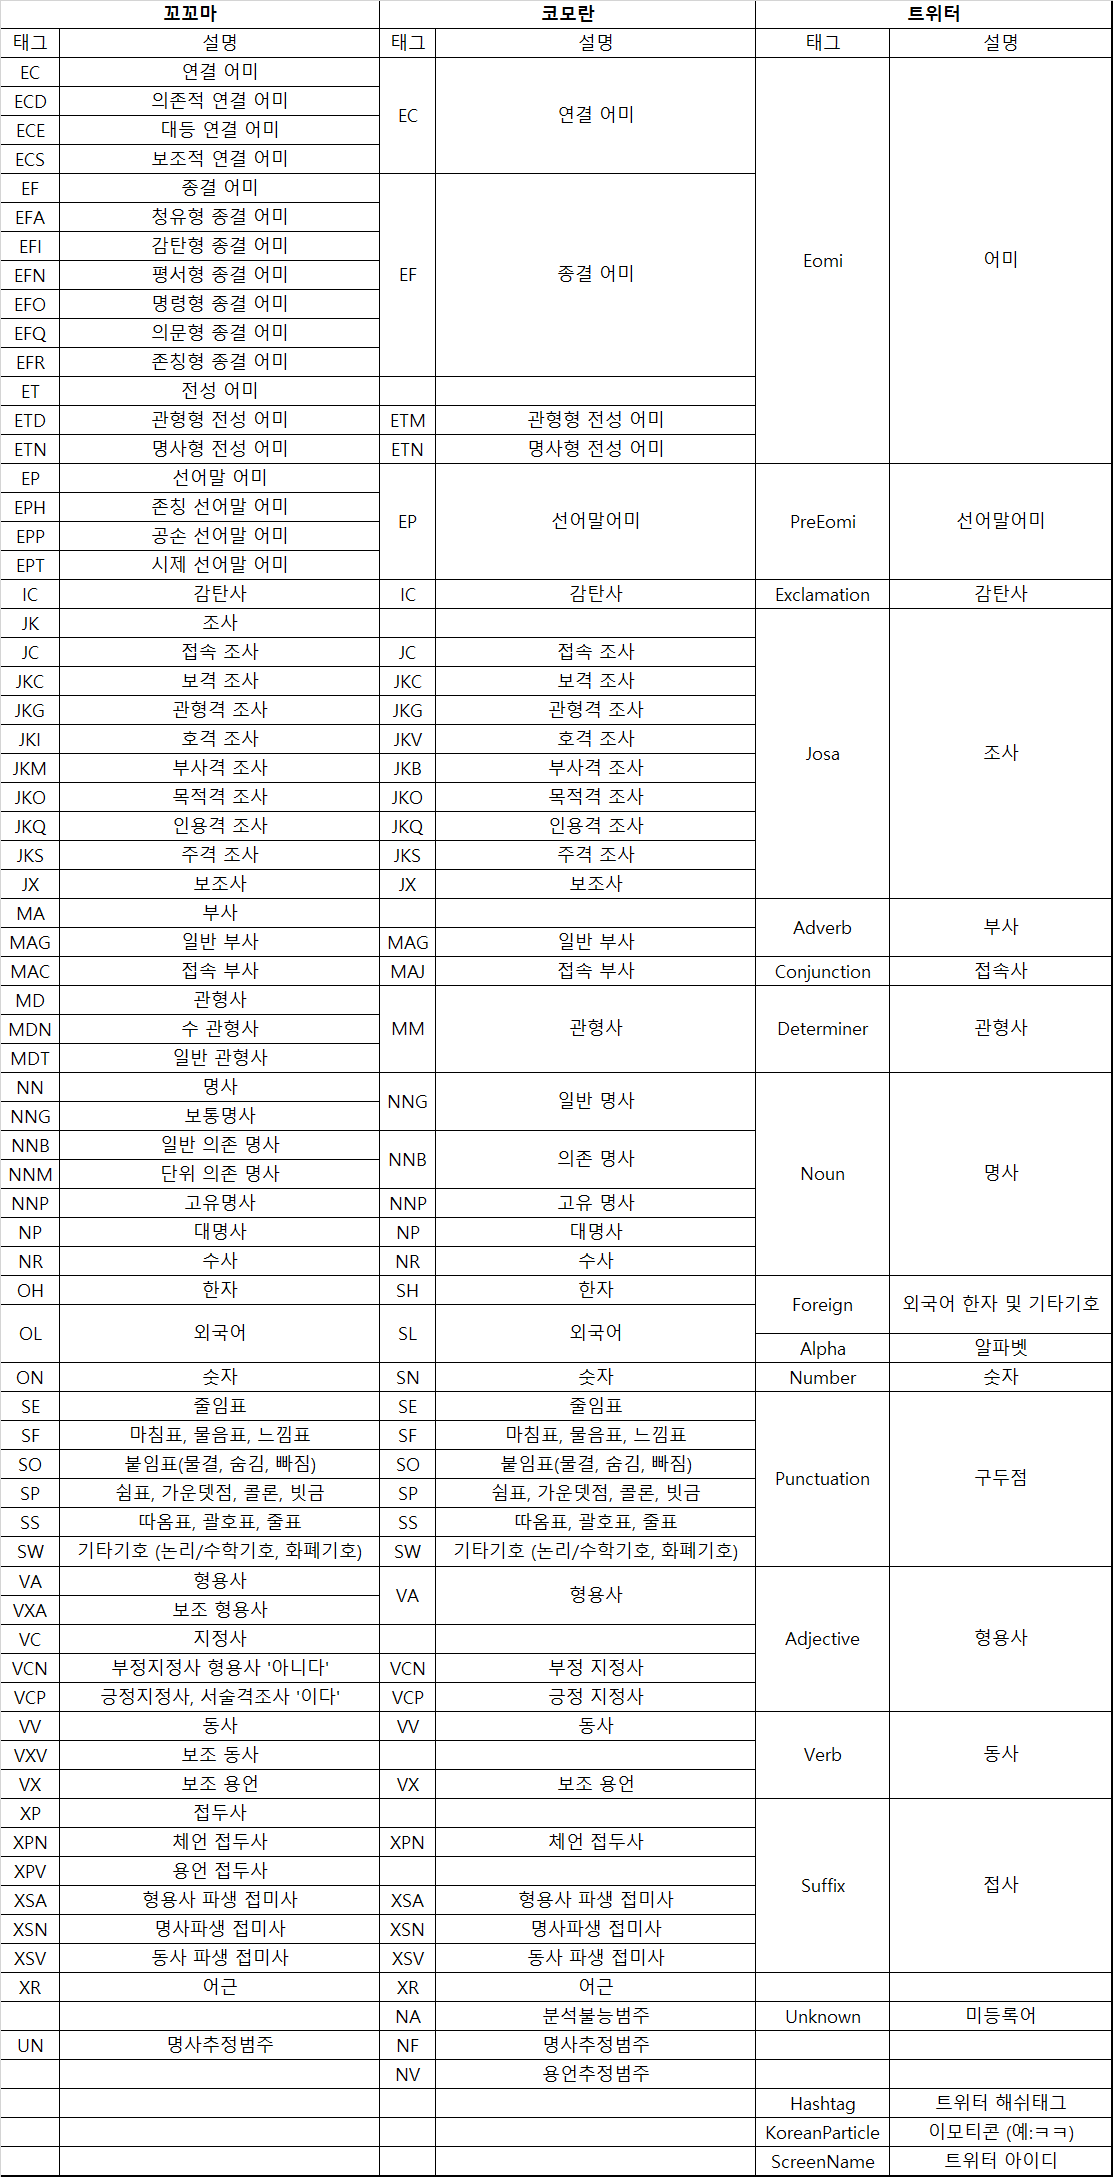

In [35]:
# Komoran vs Kkma 성능 비교

## 테스트 데이터 사용
test_df = final_top11_df.loc[:0]

import time
from konlpy.tag import Kkma, Komoran

pos_taggers = [('kkma', Kkma()), ('Komoran', Komoran())]
results = []
for name, tagger in pos_taggers:
    tokens = []
    process_time = time.time()
    for text in test_df['text_prep']:
        tokens.append(tagger.pos(text))
    process_time = time.time() - process_time
    print('tagger name = %10s, %.3f secs' % (name, process_time))
    results.append(tokens)

tagger name =       kkma, 1.129 secs
tagger name =    Komoran, 0.030 secs


In [41]:
print(results[0])

[[('박', 'NNG'), ('일', 'NNG'), ('제주', 'NNG'), ('여행', 'NNG'), ('의', 'JKG'), ('마지막', 'NNG'), ('날', 'NNG'), ('아침', 'NNG'), ('성산', 'NNG'), ('일출봉', 'NNG'), ('을', 'JKO'), ('향하', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('입장', 'NNG'), ('시간', 'NNG'), ('이', 'JKS'), ('이미', 'MAG'), ('해', 'NNG'), ('가', 'JKS'), ('다', 'MAG'), ('뜨', 'VV'), ('ㄴ', 'ETD'), ('시간', 'NNG'), ('이', 'VCP'), ('라', 'ECD'), ('일출', 'NNG'), ('을', 'JKO'), ('보', 'VV'), ('지', 'ECD'), ('는', 'JX'), ('못하', 'VX'), ('었', 'EPT'), ('지만', 'ECE'), ('한번', 'MAG'), ('올라가', 'VV'), ('보기로', 'UN'), ('하', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('하', 'VV'), ('어', 'ECS'), ('가', 'JKS'), ('너무', 'MAG'), ('비추', 'VV'), ('어서', 'ECD'), ('역광', 'NNG'), ('이', 'JKS'), ('..', 'SW'), ('사진', 'NNG'), ('찍', 'VV'), ('기', 'ETN'), ('는', 'JX'), ('좀', 'MAG'), ('힘들', 'VA'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('그리하', 'VV'), ('여도', 'ECD'), ('올라가', 'VV'), ('며', 'ECE'), ('내려다보', 'VV'), ('며', 'ECE'), ('찍', 'VV'), ('는', 'ETD'), ('사진', 'NNG'), ('은', 'JX'), ('좋

In [42]:
print(results[1])

[[('박', 'NNP'), ('일', 'NNB'), ('제주', 'NNP'), ('여행', 'NNP'), ('의', 'JKG'), ('마지막', 'NNG'), ('날', 'NNG'), ('아침', 'NNG'), ('성산 일출봉', 'NNP'), ('을', 'JKO'), ('향하', 'VV'), ('았', 'EP'), ('다', 'EF'), ('.', 'SF'), ('입장', 'NNG'), ('시간', 'NNG'), ('이', 'JKS'), ('이미', 'MAG'), ('해', 'NNG'), ('가', 'JKS'), ('다', 'MAG'), ('뜨', 'VV'), ('ㄴ', 'ETM'), ('시간', 'NNG'), ('이', 'VCP'), ('라', 'EC'), ('일출', 'NNP'), ('을', 'JKO'), ('보지', 'NNP'), ('는', 'JX'), ('못하', 'VX'), ('았', 'EP'), ('지만', 'EC'), ('한', 'MM'), ('번', 'NNB'), ('올라가', 'VV'), ('아', 'EC'), ('보', 'VV'), ('기', 'ETN'), ('로', 'JKB'), ('하', 'VV'), ('았', 'EP'), ('다', 'EF'), ('.', 'SF'), ('해', 'NNG'), ('가', 'JKS'), ('너무', 'MAG'), ('비추', 'VV'), ('어서', 'EC'), ('역광', 'NNG'), ('이', 'JKS'), ('..', 'SE'), ('사진', 'NNG'), ('찍', 'VV'), ('기', 'ETN'), ('는', 'JX'), ('좀', 'MAG'), ('힘들', 'VA'), ('었', 'EP'), ('다', 'EF'), ('.', 'SF'), ('그래도', 'MAJ'), ('올라가', 'VV'), ('며', 'EC'), ('내려다보', 'VV'), ('며', 'EC'), ('찍', 'VV'), ('는', 'ETM'), ('사진', 'NNG'), ('은', 'JX'), ('좋', 'VV'), ('

Komoran에 경우 Kkma 비해 '바로','한번', '-보기로' 등 더 정확한 태깅과 더 빠른 속도를 보여, Komoran 품사 태깅을 사용하기로 했다.

In [25]:
## 테스트 데이터 사용

komoran = Komoran()

token_tags = []

test_df = final_top11_df.loc[:1]

process_time = time.time()
for text in test_df['text_prep']:
    token_tags.extend(komoran.pos(text))
    
process_time = time.time() - process_time
print('tagger name = %5s, %.3f secs' % ('Komoran', process_time))

tagger name = Komoran, 10.595 secs


In [27]:
# 전체 tag 가져오기
tag_list = []

for tokens in token_tags:
    if tokens[1] not in tag_list:
        tag_list.append(tokens[1])

print(tag_list)

['NNP', 'NNB', 'JKG', 'NNG', 'JKO', 'VV', 'EP', 'EF', 'SF', 'JKS', 'MAG', 'ETM', 'VCP', 'EC', 'JX', 'VX', 'MM', 'ETN', 'JKB', 'SE', 'VA', 'MAJ', 'NP', 'XSA', 'NA', 'XSV', 'XSN', 'XR', 'NR', 'JC', 'XPN', 'IC']


In [78]:
# tag별 리스트 만들기
for tags in tag_list:
    globals()['{}_list'.format(tags)] = []
    
print(NNP_list, JC_list)

[] []


In [96]:
# token들을 해당 tag 리스트에 저장
for tokens in token_tags:
    globals()['{}_list'.format(tokens[1])].append(tokens[0])
    
for tags in tag_list:
    print('%s' % tags, ':', globals()['{}_list'.format(tags)])
    print('\n')

NNP : ['박', '제주', '여행', '성산 일출봉', '일출', '보지', '제주도', '정상', '보니', '성산', '일출봉', '등반', '성산 일출봉', '브런치', '우리', '창가', '테이블', '테이블', '와일드', '새우', '버거', '새우', '새우', '바다', '오니', '제멋대로', '렌트', '공항', '기념품', '기념품', '우리', '레드', '기념품', '방향제', '제주', '느낌', '자석', '자석', '돌하르방', '방향제', '레드', '자석', '냉장고', '방향제', '레드', '박', '제주', '여행', '성산 일출봉', '일출', '보지', '제주도', '정상', '보니', '성산', '일출봉', '등반', '성산 일출봉', '브런치', '우리', '창가', '테이블', '테이블', '와일드', '새우', '버거', '새우', '새우', '바다', '오니', '제멋대로', '렌트', '공항', '기념품', '기념품', '우리', '레드', '기념품', '방향제', '제주', '느낌', '자석', '자석', '돌하르방', '방향제', '레드', '자석', '냉장고', '방향제', '레드', '박', '제주', '여행', '성산 일출봉', '일출', '보지', '제주도', '정상', '보니', '성산', '일출봉', '등반', '성산 일출봉', '브런치', '우리', '창가', '테이블', '테이블', '와일드', '새우', '버거', '새우', '새우', '바다', '오니', '제멋대로', '렌트', '공항', '기념품', '기념품', '우리', '레드', '기념품', '방향제', '제주', '느낌', '자석', '자석', '돌하르방', '방향제', '레드', '자석', '냉장고', '방향제', '레드', '박', '제주', '여행', '성산 일출봉', '일출', '보지', '제주도', '정상', '보니', '성산', '일출봉', '등반', '성산 일출봉', '브런치', '우리', '창가', '테이블'

분석에 필요한 태그: NNP(고유 명사), NNG(일반 명사), VV(동사), MAG(일반 부사), VA(형용사)

In [9]:
## 전체 데이터 분석

from tqdm.notebook import tqdm_notebook
from konlpy.tag import Kkma, Komoran
import time

komoran = Komoran()

tokens_with_tags = []

process_time = time.time()
for text in tqdm_notebook(final_top11_df['text_prep']):
    tokens_with_tags.append(komoran.pos(text))
    
process_time = time.time() - process_time
print('tagger name = %5s, %.3f secs' % ('Komoran', process_time))

  0%|          | 0/21029 [00:00<?, ?it/s]

tagger name = Komoran, 3215.219 secs


In [12]:
len(tokens_with_tags)

21029

In [13]:
tokens_with_tags[1000]

[('저가', 'NNG'),
 ('항공', 'NNP'),
 ('으로', 'JKB'),
 ('예', 'NNG'),
 ('매', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('비행기', 'NNP'),
 ('예약', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETM'),
 ('호텔', 'NNP'),
 ('모두', 'MAG'),
 ('환불', 'NNG'),
 ('이', 'JKS'),
 ('되', 'VV'),
 ('지', 'EC'),
 ('않', 'VX'),
 ('는다', 'EF'),
 ('.', 'SF'),
 ('어쩌', 'VV'),
 ('ㄹ', 'ETM'),
 ('수', 'NNB'),
 ('없', 'VA'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('호흡기', 'NNG'),
 ('에', 'JKB'),
 ('는', 'JX'),
 ('마스크', 'NNP'),
 ('를', 'JKO'),
 ('달', 'VV'),
 ('고', 'EC'),
 ('손', 'NNG'),
 ('에', 'JKB'),
 ('는', 'JX'),
 ('라텍스', 'NNP'),
 ('장갑', 'NNP'),
 ('을', 'JKO'),
 ('끼', 'VV'),
 ('고', 'EC'),
 ('가', 'VV'),
 ('아', 'EC'),
 ('보', 'VX'),
 ('려', 'EC'),
 ('하', 'VX'),
 ('ㄴ다', 'EF'),
 ('.', 'SF'),
 ('목적', 'NNG'),
 ('은', 'JX'),
 ('한라산', 'NNP'),
 ('등반', 'NNP'),
 ('으로', 'JKB'),
 ('등산', 'NNP'),
 ('에', 'JKB'),
 ('최적화', 'NNP'),
 ('가', 'JKS'),
 ('되', 'VV'),
 ('도록', 'EC'),
 ('짐', 'NNG'),
 ('을', 'JKO'),
 ('캐리어', 'NNP'),
 ('에', 'JKB'),
 ('담', 'VV'),
 ('았', 'EP'),
 ('다', 'EF'),
 ('.', '

In [14]:
# pickel 저장
with open('./data/tokens_with_tags.pkl', 'wb') as f:
    pickle.dump(tokens_with_tags, f, pickle.HIGHEST_PROTOCOL)

In [31]:
# pickel 불러오기
with open('./data/tokens_with_tags.pkl', 'rb') as f:
    tokens_with_tags = pickle.load(f)

In [33]:
all_tag_list = []

for tokens in tqdm_notebook(tokens_with_tags):
    for token_set in tokens:
        if token_set[1] not in all_tag_list:
            all_tag_list.append(token_set[1])
        
print(len(tag_list), len(all_tag_list))

  0%|          | 0/21029 [00:14<?, ?it/s]

32 37


In [47]:
all_tag_list = ['NNP' ,'NNG', 'VV', 'MAG', 'VA']

# tag별 리스트 만들기
for tags in all_tag_list:
    globals()['{}_list'.format(tags)] = []
    
print(NNP_list, VA_list)

[] []


In [49]:
# token들을 해당 tag 리스트에 저장
for tokens in tqdm_notebook(tokens_with_tags):
    for token_set in tokens:
        if token_set[1] in all_tag_list:
            globals()['{}_list'.format(token_set[1])].append(token_set[0])

  0%|          | 0/21029 [00:00<?, ?it/s]

In [50]:
len(NNP_list), len(NNG_list), len(VV_list), len(MAG_list), len(VA_list)

(2445121, 3350961, 1925817, 848976, 593968)

In [55]:
# 각 tag 리스트 별 빈도수 세기
import collections

def frequency_count(tag_list, tag):
    counts = collections.Counter(tag_list)
    print('-------- %s tag의 가장 흔한 단어 top100 --------' % tag, '\n')
    print(counts.most_common(100))
    print('----------------------------------------')
    print('\n')

frequency_count(NNP_list, 'NNP')
frequency_count(NNG_list, 'NNG')
frequency_count(VV_list, 'VV')
frequency_count(MAG_list, 'MAG')
frequency_count(VA_list, 'VA')

-------- NNP tag의 가장 흔한 단어 top100 -------- 

[('제주', 132107), ('제주도', 57240), ('여행', 41816), ('카페', 30717), ('성산', 26578), ('한라산', 24555), ('일출봉', 19388), ('해변', 15206), ('우도', 15037), ('함덕', 14535), ('해수욕장', 14476), ('이', 14300), ('돼지', 13103), ('박', 12788), ('서귀포', 12126), ('폭포', 10994), ('호텔', 10884), ('오름', 10705), ('이랑', 10195), ('주차장', 8868), ('보니', 8729), ('우', 8126), ('김밥', 7982), ('전복', 7888), ('갈치', 7796), ('존', 7742), ('메뉴', 7340), ('시장', 7078), ('스팅', 7059), ('코로나', 6918), ('식당', 6836), ('공항', 6488), ('섭지코지', 6215), ('마라도', 6179), ('리', 6010), ('돌', 5993), ('주차', 5956), ('유채', 5915), ('애월', 5860), ('아이들', 5812), ('제가', 5809), ('한', 5671), ('날씨', 5557), ('장', 5489), ('커피', 5391), ('풍경', 5334), ('비행기', 5309), ('딱새', 5192), ('올레', 5160), ('숲길', 5060), ('가파도', 5009), ('만원', 4986), ('힐링', 4973), ('휴', 4960), ('드', 4953), ('라고', 4949), ('제주공항', 4930), ('바다', 4911), ('제주시', 4902), ('조식', 4891), ('고기', 4853), ('당', 4845), ('정도', 4776), ('그런지', 4724), ('구이', 4679), ('조림', 4652), ('사

In [ ]:
# # https://lovit.github.io/nlp/2018/06/07/lemmatizer/
# from soynlp.lemmatizer import Lemmatizer

# stems = {}

# lemmatizer = Lemmatizer(stems = stems)


# for word in VV_list:
#     candidates = lemmatizer.candidates(word)
#     print('{} : {}'.format(word, candidates))